<font color="#483D8B">
<h1 align="center"> Analyze Means </h1>
<h3 align="center"> Kevin Yang</h3>
<h3 align="center"> September 29, 2018</h3>
---------------

## Overview

Determine if a set of means are all equal. Utilize ANOVA to test and analyze differences in means between group/numeric variables. Utilize and understand Tukey's test. Understand the importance of both. 

Code References:
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

Bonferroni Correction reference:
http://mathworld.wolfram.com/BonferroniCorrection.html

Tukey's Test/Definition reference:
https://en.wikipedia.org/wiki/Tukey%27s_range_test

## Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Libraries are imported to utilize their specific functions. Data will not be imported for this lab, but generated. 

## Exploratory Data Analysis

Code 1: Generate random Data with no Changes to Distribution for any Group

In [2]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races, p = [0.05, 0.15 ,0.25, 0.05, 0.5], size=1000)

voter_age = stats.poisson.rvs(loc=18, mu=30, size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

Code 1 performs the one-way ANOVA test. It generates random non-uniform data for the voter_race. The P-value is 0.13, which would equate to a failure to rejecting the null hypothesis of the study. The F-statistic is 1.77. Based on the
P-value and the F-statistic, there is no significant difference between the means of each group.


Code 2: Changing Distribution for a Group to Test Difference in Means

In [3]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

Code 2 also performs a one-way ANOVA test. It also generates random non-uniform data for the voter_race, but utilizes a different distribution for one group to test the difference in group means. The F-statistic is 10.16 and the p-value is 4.5.

Code 3: Separate T-tests comparision for Each Group

In [4]:
# Get all race pairs
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]])) 

asian black
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
asian other
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)
asian white
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
black white
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
other white
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


Code 3 creates separate t-test for comparisons between a pair of races. P-values tend to be greater than 0.05 for all pairings. Although all p-values less than .1 involve white voters, which could equate to larger mean difference between both groups. We would have to take into question the differences between each pairing(mean differences) and understand any trend or similarities between the various t-tests. 

Test/Table Results:

group1,group2,meandiff,lower,upper,reject
asian,black,-0.8032,-3.4423,1.836,False
asian,hispanic,0.4143,-2.1011,2.9297,False
asian,other,-1.0645,-4.2391,2.11,False
asian,white,1.9547,-0.4575,4.3668,False
black,hispanic,1.2175,-0.386,2.821,False
black,other,-0.2614,-2.7757,2.253,False
black,white,2.7579,1.3217,4.194,True
hispanic,other,-1.4789,-3.863,0.9053,False
hispanic,white,1.5404,0.3468,2.734,True
other,white,3.0192,0.7443,5.2941,True


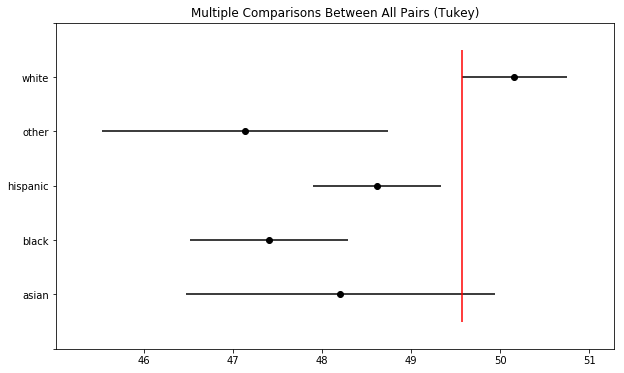

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()

 - Your interpretation of test results:
  The test suggests that that we shouldn't reject the null hypothesis in any of the pairings. Based on the confidence interval plot, only two groups overlap, other and asian. This provides support Code 3 involving separate t-tests for each pair. The p-values lower than 0.1 involving white voters include asian and other. This could mean that means for both groups are more likely affected by the "white" category. 
        

## Conclusion

 Overall, I conclude that these tests help us analyze and greatly uncover differences regarding the means across levels.
 Significant results would require difference across group means, or high variance among the means. 
 
-          Brief explanation of one-way ANOVA test
    
    The one-way ANOVA tests whether the mean of some numeric variable differ across the levels of one categorical variable. 
    Its purpose is to verify differences of means between groups. It answers the question: 'Do any of the group means differ
    from one another?'


-          What is the F-test and F-statistic? 
    
    The F-Test is the ratio of variance of two samples(two groups). The evidence is stronger if the means are more different.The F-statistics are the ratio of two variances with same values when the null hypothesis is true,which would mean an F-statistic near the value of 1. 


-          Bonferroni correction definition
    
    The Bonferroni correction is a multiple-comparison correction method used when there multiple dependent, or independent statistical tests are being performed simultaneously. The Bonferroni correction rejects An example would involve Code 3, where multiple comparisons are made.The chance that a rare event would occur increases with multiple comparisons/hypothesis tests, which would increase the making of a Type 1 error.  


-          Why would you use Tukey’s test?
    
    I would use Tukey's test because it can be used on raw data and find means that are significantly different from each other. It provides the average difference, confidence interval and is one of the best option to compare pairs of means. 
